# PreTP 2 - Grafos en neurociencia


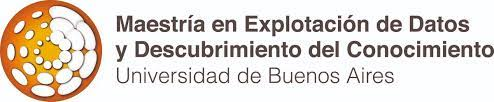

**_Data mining en Ciencia y Tecnología_**  
2do cuatrimestre 2023

[Víctor A. Bettachini](mailto:bettachini@gmail.com)  
2023-10-24

## 4. Preprocesamiento de datos

### Carga datos
Cargar el dataset con los datos para cada sujeto y los nombres y coordenadas de las
regiones cerebrales a las que se les registró la actividad.

In [32]:
from pathlib import Path
if not Path("./DataSujetos").is_dir():
  ! wget -q https://www.dropbox.com/s/eei6gnw10o20mcn/DataSujetos.zip?dl=1 -O DataSujetos.zip
  ! unzip -q DataSujetos
  ! rm DataSujetos.zip

In [33]:
if not Path("./aal_extended_withCoords.csv").exists():
  ! wget -q "https://www.dropbox.com/scl/fi/pu1qdch4c3khk0uol9l0w/aal_extended_withCoords.csv?rlkey=bsnfot3b9ycp7slble59e1cws&dl=1n" -O aal_extended_withCoords.csv

### Descrición de los datos
Reportar cuántos sujetos y cuántos estados de sueño se observan en el conjunto de
datos.

Sujetos = 18  
Estados de sueño 4 condiciones, una correspondiente a vigilia y 3 a diferentes estadios del sueño no REM (*rapid eye movement*):  
- "W": despierto ("Wake")  
- "N1": sueño "leve"  
- "N2": sueño "intermedio"  
- "N3": sueño "profundo"  

## 5. Manipulación de datos

### Correlaciones entre regiones
Graficar la matriz de correlaciones entre regiones (es decir, la "matriz de adyacencia
pesada") para el sujeto 2 de la condición despierto ("Wake")

In [34]:
import pandas as pd
import numpy as np

In [35]:
filename = './DataSujetos/W_suj2.csv'
df = pd.read_csv(filename, header=None)
matAdyacPesada = df.values
n = matAdyacPesada.shape[0]
matAdyacPesada -= np.diag(np.ones(n))

In [36]:
try:
  import seaborn as sns
  import matplotlib.pyplot as plt
except:
  ! pip install -q seaborn
  import seaborn as sns
  import matplotlib.pyplot as plt

(0.0, 116.0)

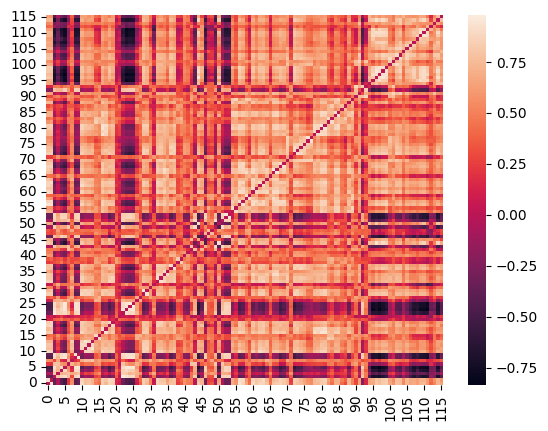

In [37]:
sns.heatmap(matAdyacPesada)
plt.xlim(0,n)
plt.ylim(0,n)

### Correlación entre regiones
Transformar dicha matriz de adyacencia pesada a una matriz de adyancia binaria $A_{i,j}$ que represente una una densidad de enlaces $\delta = 0.08$.
¿Cuál es el valor de umbral de correlación entre pares de regiones que tuvo que utilizar?

Repaso de definiciones
- grado, es el número de enlaces del nodo i, $k_i = \sum_{j=1}^n A_{i,j}$ siendo $n$ el número de nodos
- el número total de enlaces $m = \frac{1}{2} \sum_{i=1}^n k_i = \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n A_{i,j}$, para grafos no dirigidos (el medio es porque se cuenta doble)
- densidad $\rho = \frac{2 m}{n (n-1)}$

A prueba y error.

In [38]:
# Prueba y error  
th = 0.779970
matAdyacNoPesada = (matAdyacPesada >= th)
n = len(matAdyacNoPesada)
densidad = sum(sum(matAdyacNoPesada))/ (n* (n-1))
densidad

0.0800599700149925

El umbral para lograr una densidad de enlaces de $\delta \approx 0.08$ es 0.779.

Con la función provista en clase

In [39]:
def density_to_th(W, d):
    n=W.shape[0]
    max_links = (n*(n-1))//2
    tril_idx = np.tril_indices(n,-1)
    c = sorted(np.array(list(W[tril_idx].reshape(-1))), reverse=True)
    return c[int((len(c)-1)*d)]

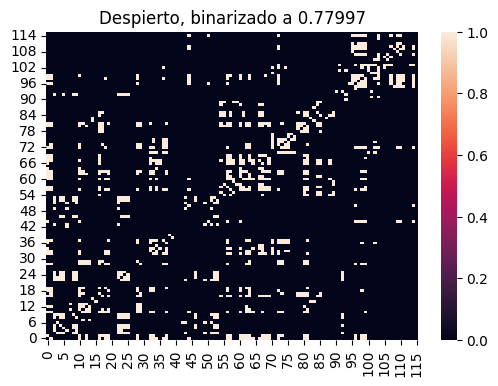

In [40]:
matAdyacPesadaWake = matAdyacPesada.copy()
densidad = 0.08 # comparemos ambos estados con una densidad de enlaces de 10%

plt.figure(figsize=(6,4))

thWake = density_to_th(matAdyacPesadaWake, densidad)
sns.heatmap(matAdyacPesadaWake >= thWake)
plt.xlim(0,n)
plt.ylim(0,n);
plt.title(f'Despierto, binarizado a {thWake}')
plt.show()

### Generar grafo
Utilizando Ai,j , obtener el grafo resultante G.

In [41]:
try:
  import networkx as nx
except:
  ! pip install networkx
  import networkx as nx

In [42]:
G = nx.from_numpy_array(matAdyacNoPesada)

### Conectividad
¿Es G un grafo conectado?
¿Se puede calcular la distancia media entre pares de nodos
d del grafo G?
¿Si no se puede, qué medida equivalente calcularías?

Conectado: que cada nodo (vertex) tenga al menos un enlace (edge).
¿Cómo lo determino sin generar una representación gráfica?

In [95]:
nx.algorithms.components.is_connected(G)

False

La distancia entre nodos: longitud (número de enlaces) del camino más corto entre ellos.  
Pero al no ser conectada la red, hay nodos que no participan en enlaces, ergo no hay forma de definir distancias para cualquier pares de nodos.

In [94]:
# nx.average_shortest_path_length(G) # NA

NetworkXError: Found infinite path length because the graph is not connected

### Distancias para componentes conectados
Calcular $d$ para cada componente conectado de G.
Calcular la eficiencia global $\mathrm{eff}$ del grafo G.

In [93]:
# Calculate the connected components of the graph.
connected_components = nx.connected_components(G)

# Find the shortest path between all pairs of nodes in each connected component.
shortest_paths = {}
for connected_component in connected_components:
    shortest_paths[connected_component] = nx.all_pairs_dijkstra_path_length(G.subgraph(connected_component))

TypeError: unhashable type: 'set'

In [74]:
ds = nx.shortest_path(G)


In [84]:
for ed in graph_edges:
    print( ed[0], ed[1], ds[ed[0]][ed[1]] )

0 1 [0, 1]
0 10 [0, 10]
0 12 [0, 12]
0 16 [0, 16]
0 18 [0, 18]
0 19 [0, 19]
0 28 [0, 28]
0 32 [0, 32]
0 33 [0, 33]
0 34 [0, 34]
0 36 [0, 36]
0 37 [0, 37]
0 44 [0, 44]
0 56 [0, 56]
0 57 [0, 57]
0 60 [0, 60]
0 61 [0, 61]
0 62 [0, 62]
0 63 [0, 63]
0 64 [0, 64]
0 66 [0, 66]
0 67 [0, 67]
0 68 [0, 68]
0 69 [0, 69]
0 72 [0, 72]
0 80 [0, 80]
0 81 [0, 81]
0 96 [0, 96]
0 98 [0, 98]
0 99 [0, 99]
1 10 [1, 10]
1 12 [1, 12]
1 16 [1, 16]
1 17 [1, 17]
1 18 [1, 18]
1 19 [1, 19]
1 28 [1, 28]
1 32 [1, 32]
1 33 [1, 33]
1 37 [1, 37]
1 56 [1, 56]
1 57 [1, 57]
1 60 [1, 60]
1 61 [1, 61]
1 62 [1, 62]
1 63 [1, 63]
1 67 [1, 67]
1 68 [1, 68]
1 69 [1, 69]
1 72 [1, 72]
1 73 [1, 73]
1 80 [1, 80]
1 81 [1, 81]
1 96 [1, 96]
1 98 [1, 98]
1 99 [1, 99]
2 3 [2, 3]
2 4 [2, 4]
2 5 [2, 5]
2 8 [2, 8]
2 9 [2, 9]
2 22 [2, 22]
2 23 [2, 23]
2 24 [2, 24]
2 25 [2, 25]
2 43 [2, 43]
2 49 [2, 49]
2 51 [2, 51]
2 52 [2, 52]
2 53 [2, 53]
2 92 [2, 92]
3 6 [3, 6]
3 9 [3, 9]
3 22 [3, 22]
3 23 [3, 23]
4 5 [4, 5]
4 8 [4, 8]
4 9 [4, 9]
4 22 [4,

### Lista de enlaces

En este grafo están estos enlaces (edges):

In [51]:
graph_edges = G.edges()
graph_edges

EdgeView([(0, 1), (0, 10), (0, 12), (0, 16), (0, 18), (0, 19), (0, 28), (0, 32), (0, 33), (0, 34), (0, 36), (0, 37), (0, 44), (0, 56), (0, 57), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 66), (0, 67), (0, 68), (0, 69), (0, 72), (0, 80), (0, 81), (0, 96), (0, 98), (0, 99), (1, 10), (1, 12), (1, 16), (1, 17), (1, 18), (1, 19), (1, 28), (1, 32), (1, 33), (1, 37), (1, 56), (1, 57), (1, 60), (1, 61), (1, 62), (1, 63), (1, 67), (1, 68), (1, 69), (1, 72), (1, 73), (1, 80), (1, 81), (1, 96), (1, 98), (1, 99), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (2, 22), (2, 23), (2, 24), (2, 25), (2, 43), (2, 49), (2, 51), (2, 52), (2, 53), (2, 92), (3, 6), (3, 9), (3, 22), (3, 23), (4, 5), (4, 8), (4, 9), (4, 22), (4, 23), (4, 24), (4, 25), (4, 46), (4, 52), (4, 53), (5, 8), (5, 9), (5, 22), (5, 23), (5, 24), (5, 25), (5, 46), (5, 52), (5, 53), (5, 92), (6, 42), (6, 43), (6, 49), (6, 51), (7, 11), (7, 13), (8, 9), (8, 22), (8, 23), (8, 24), (8, 25), (8, 46), (8, 52), (8, 53), (8, 92), (9, 22), (9, 2

La cantidad de los mismos es 

In [ ]:
G.number_of_edges()

534

### Estadísticos
Calcular el grado promedio $\langle k \rangle$, el nodo con grado máximo $k_\text{máx}$, el coeficiente de clustering promedio $C = \langle C_i \rangle$ y la distancia media entre pares de nodos $d$ del grafo.

In [60]:
degrees = G.degree() # Diccionario con ID de nodo y su grado
nodes = G.nodes()
n_color = np.asarray([degrees[n] for n in nodes])

max_degrees = max(n_color)
n_color = n_color/max_degrees


In [ ]:
k_promedio = np.mean(n_color* max_degrees)
print("k medio =", k_promedio)

k medio = 9.206896551724139


In [ ]:
print("k máximo =",  max_degrees)

k máximo = 30


In [ ]:
print("C=", np.mean(n_color) )

C= 0.3068965517241379


### Visualización del grafo
Visualizar el grafo, ubicando los nodos en sus coordenadas cerebrales y coloreando cada
nodo de acuerdo a su coeficiente de clustering $C_i$

In [ ]:
# Carga de coordenadas de regiones
RegionsNames = pd.read_csv("aal_extended_withCoords.csv", header=None).iloc[:,1:]

In [ ]:
RegionsNames.head()

,1,2,3,4,5,6,7
0,Precentral_L,2001,Central,L,-39,-6,51
1,Precentral_R,2002,Central,R,41,-8,52
2,Frontal_Sup_L,2101,Frontal,L,-18,35,42
3,Frontal_Sup_R,2102,Frontal,R,22,31,44
4,Frontal_Sup_Orb_L,2111,Frontal,L,-17,47,-13


Entiendo el coeficiente $C_i = \frac{k_i}{\mathrm{máx} (k_i)}$

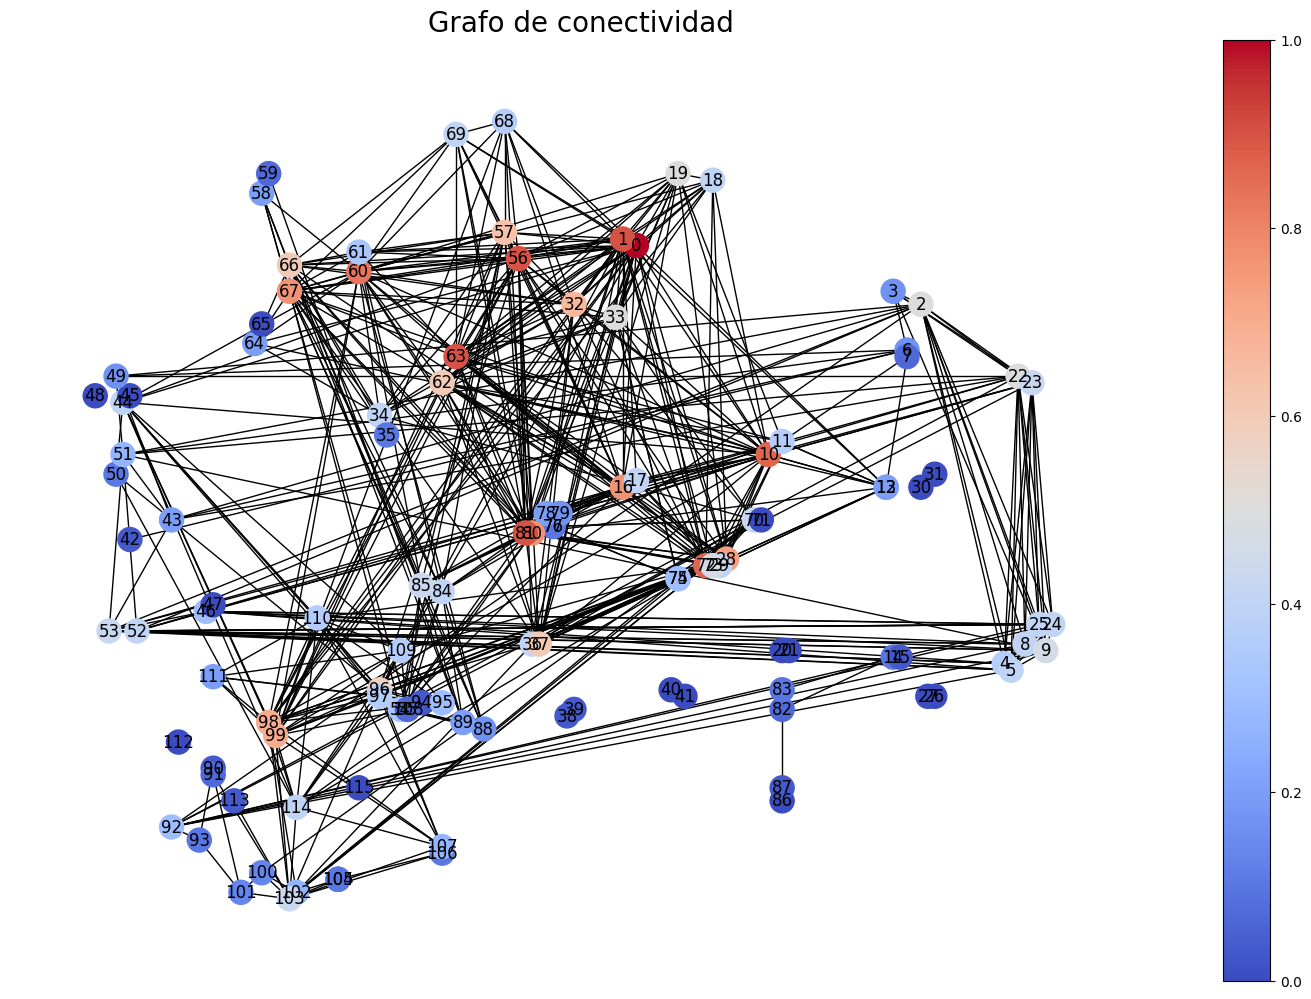

In [ ]:
# Visualizar el grafo, ubicando los nodos en sus coordenadas cerebrales y coloreando cada nodo de acuerdo a su coeficiente de clustering Ci
fig, ax = plt.subplots(figsize=(15,10))
fig.tight_layout()
ax.title.set_text('Grafo de conectividad')
ax.title.set_fontsize(20)

layout = dict(zip(range(n),np.array([RegionsNames[6].values, RegionsNames[7].values]).T))

vmin = min(n_color)
vmax = max(n_color)
color_map = plt.cm.coolwarm
nx.draw(G, layout, node_color = n_color, with_labels = True, node_size = 300,
  cmap = color_map,
  vmin = vmin, vmax = vmax)
sm = plt.cm.ScalarMappable(cmap = color_map, norm = plt.Normalize(vmin = vmin, vmax = vmax))
cbar = plt.colorbar(sm, ax=ax)

### Distribución de grados
Graficar la distribución de grado del grafo, elijiendo un número de bins apropriado

Text(0.5, 1.0, 'Distribucion de grados, despierto')

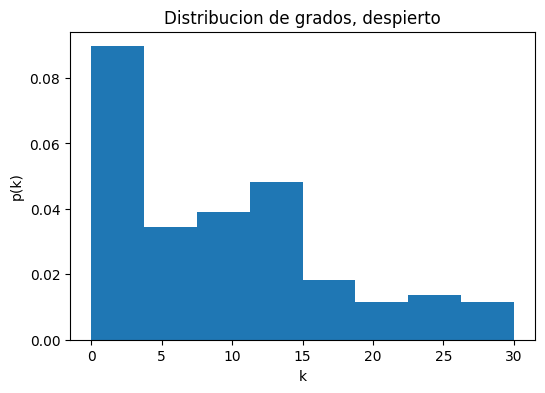

In [ ]:
plt.figure(figsize=(6,4))
Gwake = nx.from_numpy_array(matAdyacPesadaWake >= thWake)
degreesWake = [Gwake.degree(n) for n in Gwake.nodes()]
plt.hist(degreesWake , bins = 8, density = True)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Distribucion de grados, despierto')

### Comparación con otras redes

Comparar lo obtenido con prototipos de redes poissonianas, small-World y scale-free, usando los algoritmos de Erdos-Renyi, Watts-Strogatz y Barabasi-Albert, respectivamente.
Elegir (y reportar) los parámetros utilizdos para cada algoritmo, buscando siempre que los grafos simulados sean comparables al grafo de datos G (en términos de número de nodos y números de enlaces).
Visualizar un ejemplo de grafo para cada uno de estos prototipos de redes.
Discutir diferencias.

### 1000 instancias
Generar 1000 instancias de grafos para cada uno de dichos prototipos (poissonianas,
small-World y scale-free).
Para el conjunto de 1000 instancias de cada prototipo, calcular el histograma de coeficientes de $\langle k \rangle$, $k_\text{máx}$ , $C$, y $\text{eff}$.
Comparar con los valores de coeficientes que obtuvimos para el grafo de datos G

In [ ]:
import os

In [ ]:
files = os.listdir('DataSujetos/')
# files

In [ ]:
filenames = Path('DataSujetos').glob('W_*.csv')
# next(filenames)

In [ ]:
filenames

<generator object Path.glob at 0x7fc089bfcf90>